In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=df.to_html().replace('table','table style="display:inline-block"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from lib.equity.fundamentals import Fundamentals, Ranks, DCF, Columns
from lib.equity.time_series import Technicals
from lib.equity.attribution import Attribution, FammaFrench, Brinson
from lib.fixed_income.rates import Treasuries

C:\dev\pynance\lib
C:\dev\pynance\lib


# Attribution

What factors are driving broader market returns?

In [3]:
atr = Attribution()
holdings = atr.get_holdings('XLF') #SPY
returns = atr.get_portfolio_returns()
portf_returns = returns.resample('M').sum()

Extracting: https://www.zacks.com/funds/etf/XLF/holding

1 Failed download:
- BRK.B: No data found, symbol may be delisted


## Famma French

In [4]:
ff = FammaFrench(model = 'ThreeFactors', portf_rets = portf_returns)
print(ff.summary)

                            OLS Regression Results                            
Dep. Variable:           portf_ex_rtn   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     36.93
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.15e-07
Time:                        19:22:54   Log-Likelihood:                -42.582
No. Observations:                  21   AIC:                             93.16
Df Residuals:                      17   BIC:                             97.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0375      0.478     -0.078      0.9

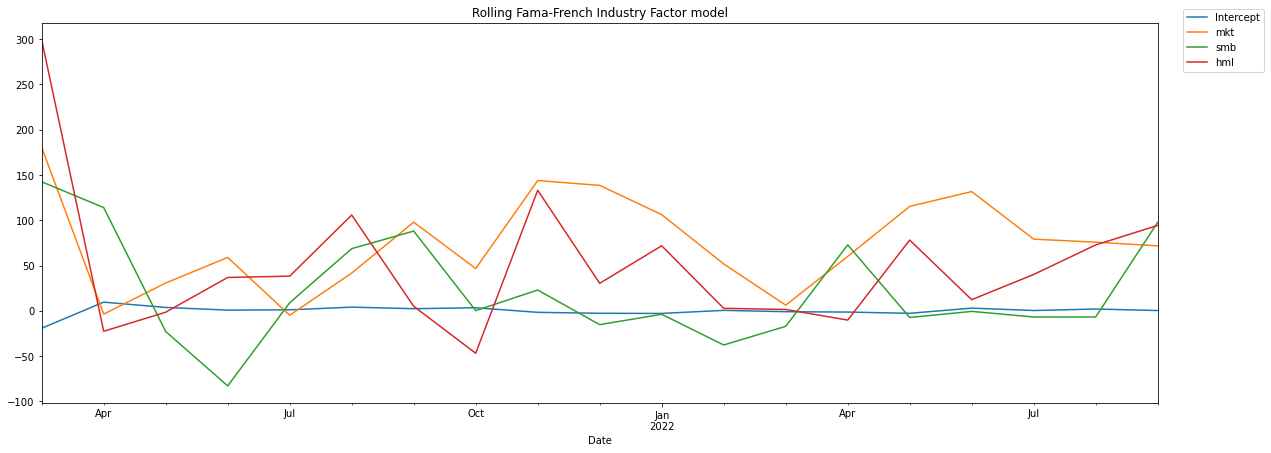

In [5]:
ff.plot()

In [6]:
ff = FammaFrench(model = 'IndustryFactors', portf_rets = portf_returns)
print(ff.summary)

                            OLS Regression Results                            
Dep. Variable:              portf_rtn   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     37.04
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.45e-06
Time:                        19:23:18   Log-Likelihood:                -25.557
No. Observations:                  21   AIC:                             73.11
Df Residuals:                      10   BIC:                             84.60
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1240      0.529      2.124      0.0

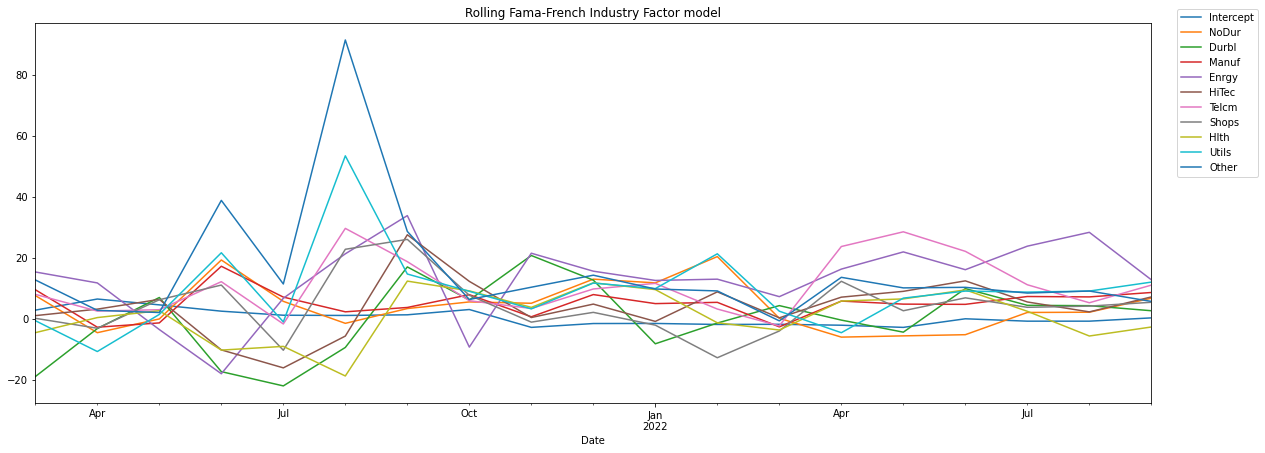

In [7]:
ff.plot()

## Brinson

In [8]:
...

Ellipsis

# Fundamentals

Fundamental Equity Analysis

In [21]:
ticker = ['JNJ']

In [22]:
rank = Ranks(ticker = ticker[0])
ranks = rank.get_ranks() 

In [23]:
fun = Fundamentals( ticker = ticker)
fun

<strong>Left Frame:</strong> Values as reported (in Millions, USD)<br>
<strong>Middle Frame:</strong> Percent Change <br>
<strong>Right Frame:</strong> Percentile Rank vs. Industry Peers (Higher values are assigned a lower percentile rank)<br>

In [24]:
x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.INCOME.value)

display_side_by_side(x, y, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 $23,338.0 
 $24,804.0 
 $23,426.0 
 $24,020.0 
 $23,791.0 
 
 
 cogs 
 $7,250.0 
 $7,955.0 
 $7,598.0 
 $7,919.0 
 $7,807.0 
 
 
 gp 
 $16,088.0 
 $16,849.0 
 $15,828.0 
 $16,101.0 
 $15,984.0 
 
 
 opex 
 $10,382.0 
 $11,957.0 
 $10,080.0 
 $10,014.0 
 $9,768.0 
 
 
 opinc 
 $5,706.0 
 $4,892.0 
 $5,748.0 
 $6,087.0 
 $6,216.0 
 
 
 ebt 
 $3,849.0 
 $4,836.0 
 $5,862.0 
 $5,840.0 
 $5,822.0 
 
 
 netinc 
 $3,667.0 
 $4,736.0 
 $5,149.0 
 $4,814.0 
 $4,458.0 
 
 
 ebitda 
 $5,683.0 
 $6,739.0 
 $7,641.0 
 $7,622.0 
 $7,558.0 
 
 
 depamor 
 $1,814.0 
 $1,843.0 
 $1,769.0 
 $1,744.0 
 $1,685.0 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 nan% 
 6.28% 
 -5.56% 
 2.54% 
 -0.95% 
 
 
 cogs 
 nan% 
 9.72% 
 -4.49% 
 4.22% 
 -1.41% 
 
 
 gp 
 nan% 
 4.73% 
 -6.06% 
 1.72% 
 -0.73% 
 
 
 opex 
 nan% 
 15.17% 
 -15.70% 
 -0.65% 
 -2.46% 
 
 
 opinc 
 nan% 
 -14.27% 
 17.50% 
 5.90% 
 2.12% 
 
 
 ebt 
 nan% 
 25.64% 
 21.22% 
 -0.38% 
 -0.31% 
 
 
 netinc 
 nan% 
 29.15% 
 8.72% 
 -6.51% 
 -7.40% 
 
 
 ebitda 
 nan% 
 18.58% 
 13.38% 
 -0.25% 
 -0.84% 
 
 
 depamor 
 nan% 
 1.60% 
 -4.02% 
 -1.41% 
 -3.38% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 12% 
 12% 
 12% 
 18% 
 25% 
 
 
 cogs 
 12% 
 18% 
 12% 
 18% 
 25% 
 
 
 gp 
 6% 
 12% 
 6% 
 18% 
 25% 
 
 
 opex 
 6% 
 12% 
 6% 
 12% 
 25% 
 
 
 opinc 
 12% 
 18% 
 12% 
 18% 
 25% 
 
 
 ebt 
 19% 
 18% 
 12% 
 18% 
 25% 
 
 
 netinc 
 19% 
 18% 
 12% 
 18% 
 25% 
 
 
 ebitda 
 38% 
 18% 
 12% 
 18% 
 25% 
 
 
 depamor 
 38% 
 29% 
 25% 
 29% 
 75%

In [25]:
x = fun.get( columns = Columns.CASHFLOW.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.CASHFLOW.value)

display_side_by_side(x, y, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 cashneq 
 $17,604.0 
 $14,487.0 
 $10,463.0 
 $10,983.0 
 $11,355.0 
 
 
 netinc 
 $3,667.0 
 $4,736.0 
 $5,149.0 
 $4,814.0 
 $4,458.0 
 
 
 depamor 
 $1,814.0 
 $1,843.0 
 $1,769.0 
 $1,744.0 
 $1,685.0 
 
 
 opex 
 $10,382.0 
 $11,957.0 
 $10,080.0 
 $10,014.0 
 $9,768.0 
 
 
 receivables 
 $14,911.0 
 $15,283.0 
 $15,594.0 
 $16,139.0 
 $15,890.0 
 
 
 payables 
 $8,961.0 
 $11,055.0 
 $9,309.0 
 $9,765.0 
 $10,153.0 
 
 
 inventory 
 $10,387.0 
 $10,387.0 
 $10,990.0 
 $11,437.0 
 $11,675.0 
 
 
 ncfo 
 $8,290.0 
 $5,732.0 
 $3,979.0 
 $5,581.0 
 $6,284.0 
 
 
 ncfbus 
 $12.0 
 $-15.0 
 $-4.0 
 $-205.0 
 $9.0 
 
 
 ncfi 
 $-2,719.0 
 $-5,360.0 
 $-3,634.0 
 $-2,639.0 
 $-1,701.0 
 
 
 ncfinv 
 $-1,968.0 
 $-3,836.0 
 $-2,964.0 
 $-1,460.0 
 $-720.0 
 
 
 ncfdiv 
 $-2,791.0 
 $-2,791.0 
 $-2,787.0 
 $-2,971.0 
 $-2,970.0 
 
 
 ncfx 
 $-92.0 
 $-53.0 
 $16.0 
 $-161.0 
 $-286.0 
 
 
 ncff 
 $-2,207.0 
 $-3,436.0 
 $-4,385.0 
 $-2,261.0 
 $-3,925.0 
 
 
 fcf 
 $7,543.0 
 $4,317.0 
 $3,372.0 
 $4,718.0 
 $5,332.0 
 
 
 ncf 
 $3,272.0 
 $-3,117.0 
 $-4,024.0 
 $520.0 
 $372.0 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 cashneq 
 nan% 
 -17.71% 
 -27.78% 
 4.97% 
 3.39% 
 
 
 netinc 
 nan% 
 29.15% 
 8.72% 
 -6.51% 
 -7.40% 
 
 
 depamor 
 nan% 
 1.60% 
 -4.02% 
 -1.41% 
 -3.38% 
 
 
 opex 
 nan% 
 15.17% 
 -15.70% 
 -0.65% 
 -2.46% 
 
 
 receivables 
 nan% 
 2.49% 
 2.03% 
 3.49% 
 -1.54% 
 
 
 payables 
 nan% 
 23.37% 
 -15.79% 
 4.90% 
 3.97% 
 
 
 inventory 
 nan% 
 0.00% 
 5.81% 
 4.07% 
 2.08% 
 
 
 ncfo 
 nan% 
 -30.86% 
 -30.58% 
 40.26% 
 12.60% 
 
 
 ncfbus 
 nan% 
 -225.00% 
 73.33% 
 -5,025.00% 
 104.39% 
 
 
 ncfi 
 nan% 
 -97.13% 
 32.20% 
 27.38% 
 35.54% 
 
 
 ncfinv 
 nan% 
 -94.92% 
 22.73% 
 50.74% 
 50.68% 
 
 
 ncfdiv 
 nan% 
 -0.00% 
 0.14% 
 -6.60% 
 0.03% 
 
 
 ncfx 
 nan% 
 42.39% 
 130.19% 
 -1,106.25% 
 -77.64% 
 
 
 ncff 
 nan% 
 -55.69% 
 -27.62% 
 48.44% 
 -73.60% 
 
 
 fcf 
 nan% 
 -42.77% 
 -21.89% 
 39.92% 
 13.01% 
 
 
 ncf 
 nan% 
 -195.26% 
 -29.10% 
 112.92% 
 -28.46% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 cashneq 
 6% 
 6% 
 25% 
 6% 
 25% 
 
 
 netinc 
 19% 
 18% 
 12% 
 18% 
 25% 
 
 
 depamor 
 38% 
 29% 
 25% 
 29% 
 75% 
 
 
 opex 
 6% 
 12% 
 6% 
 12% 
 25% 
 
 
 receivables 
 6% 
 6% 
 6% 
 6% 
 25% 
 
 
 payables 
 25% 
 24% 
 25% 
 24% 
 25% 
 
 
 inventory 
 12% 
 6% 
 6% 
 6% 
 25% 
 
 
 ncfo 
 19% 
 18% 
 25% 
 18% 
 25% 
 
 
 ncfbus 
 12% 
 71% 
 56% 
 76% 
 25% 
 
 
 ncfi 
 88% 
 94% 
 100% 
 88% 
 75% 
 
 
 ncfinv 
 94% 
 94% 
 94% 
 82% 
 100% 
 
 
 ncfdiv 
 100% 
 100% 
 88% 
 100% 
 100% 
 
 
 ncfx 
 100% 
 82% 
 12% 
 94% 
 100% 
 
 
 ncff 
 81% 
 82% 
 75% 
 76% 
 50% 
 
 
 fcf 
 25% 
 24% 
 38% 
 24% 
 25% 
 
 
 ncf 
 25% 
 94% 
 100% 
 29% 
 75%

In [26]:
x = fun.get( columns = Columns.BALANCE.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.BALANCE.value)

display_side_by_side(x, y, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 assetsc 
 $59,889.0 
 $60,979.0 
 $60,424.0 
 $63,847.0 
 $65,236.0 
 
 
 assetsnc 
 $119,339.0 
 $121,039.0 
 $117,931.0 
 $113,877.0 
 $109,888.0 
 
 
 receivables 
 $14,911.0 
 $15,283.0 
 $15,594.0 
 $16,139.0 
 $15,890.0 
 
 
 inventory 
 $10,387.0 
 $10,387.0 
 $10,990.0 
 $11,437.0 
 $11,675.0 
 
 
 assets 
 $179,228.0 
 $182,018.0 
 $178,355.0 
 $177,724.0 
 $175,124.0 
 
 
 liabilitiesc 
 $44,561.0 
 $45,226.0 
 $43,390.0 
 $44,821.0 
 $45,543.0 
 
 
 liabilitiesnc 
 $64,395.0 
 $62,769.0 
 $60,256.0 
 $56,546.0 
 $54,982.0 
 
 
 payables 
 $8,961.0 
 $11,055.0 
 $9,309.0 
 $9,765.0 
 $10,153.0 
 
 
 debt 
 $33,928.0 
 $33,751.0 
 $33,148.0 
 $32,597.0 
 $32,027.0 
 
 
 equity 
 $70,272.0 
 $74,023.0 
 $74,709.0 
 $76,357.0 
 $74,599.0 
 
 
 retearn 
 $121,092.0 
 $123,060.0 
 $124,380.0 
 $126,216.0 
 $127,917.0 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 assetsc 
 nan% 
 1.82% 
 -0.91% 
 5.66% 
 2.18% 
 
 
 assetsnc 
 nan% 
 1.42% 
 -2.57% 
 -3.44% 
 -3.50% 
 
 
 receivables 
 nan% 
 2.49% 
 2.03% 
 3.49% 
 -1.54% 
 
 
 inventory 
 nan% 
 0.00% 
 5.81% 
 4.07% 
 2.08% 
 
 
 assets 
 nan% 
 1.56% 
 -2.01% 
 -0.35% 
 -1.46% 
 
 
 liabilitiesc 
 nan% 
 1.49% 
 -4.06% 
 3.30% 
 1.61% 
 
 
 liabilitiesnc 
 nan% 
 -2.53% 
 -4.00% 
 -6.16% 
 -2.77% 
 
 
 payables 
 nan% 
 23.37% 
 -15.79% 
 4.90% 
 3.97% 
 
 
 debt 
 nan% 
 -0.52% 
 -1.79% 
 -1.66% 
 -1.75% 
 
 
 equity 
 nan% 
 5.34% 
 0.93% 
 2.21% 
 -2.30% 
 
 
 retearn 
 nan% 
 1.63% 
 1.07% 
 1.48% 
 1.35% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 assetsc 
 6% 
 6% 
 6% 
 12% 
 25% 
 
 
 assetsnc 
 19% 
 12% 
 12% 
 18% 
 25% 
 
 
 receivables 
 6% 
 6% 
 6% 
 6% 
 25% 
 
 
 inventory 
 12% 
 6% 
 6% 
 6% 
 25% 
 
 
 assets 
 6% 
 6% 
 12% 
 12% 
 25% 
 
 
 liabilitiesc 
 6% 
 6% 
 6% 
 12% 
 25% 
 
 
 liabilitiesnc 
 12% 
 12% 
 19% 
 18% 
 25% 
 
 
 payables 
 25% 
 24% 
 25% 
 24% 
 25% 
 
 
 debt 
 38% 
 24% 
 38% 
 29% 
 50% 
 
 
 equity 
 12% 
 12% 
 12% 
 12% 
 25% 
 
 
 retearn 
 19% 
 18% 
 12% 
 18% 
 50%

In [28]:
x = fun.get( columns = Columns.PEERS.value, limit = 5 ).style_jupyter(fun.df, units = '%')
z = ranks.style_jupyter(cols = Columns.PEERS.value)

display_side_by_side(x, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 divyield 
 2.60% 
 2.40% 
 2.40% 
 2.40% 
 2.70% 
 
 
 grossmargin 
 68.90% 
 67.90% 
 67.60% 
 67.00% 
 67.20% 
 
 
 netmargin 
 68.93% 
 67.93% 
 67.57% 
 67.03% 
 67.19% 
 
 
 fcfmargin 
 32.32% 
 17.40% 
 14.39% 
 19.64% 
 22.41% 
 
 
 oppmargin 
 24.45% 
 19.72% 
 24.54% 
 25.34% 
 26.13% 
 
 
 roe 
 5.22% 
 6.40% 
 6.89% 
 6.30% 
 5.98% 
 
 
 roic 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 ros 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 roc 
 3.52% 
 4.39% 
 4.77% 
 4.42% 
 4.18% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 divyield 
 62% 
 59% 
 59% 
 65% 
 50% 
 
 
 grossmargin 
 75% 
 71% 
 75% 
 94% 
 100% 
 
 
 netmargin 
 75% 
 71% 
 75% 
 94% 
 100% 
 
 
 fcfmargin 
 56% 
 76% 
 69% 
 59% 
 100% 
 
 
 oppmargin 
 44% 
 47% 
 50% 
 41% 
 50% 
 
 
 roe 
 69% 
 53% 
 50% 
 53% 
 50% 
 
 
 roic 
 53% 
 53% 
 53% 
 53% 
 62% 
 
 
 ros 
 53% 
 53% 
 53% 
 53% 
 62% 
 
 
 roc 
 50% 
 35% 
 31% 
 29% 
 50%

## Peers

Selected ticker vs Industry Peers

Drug Manufacturers - General


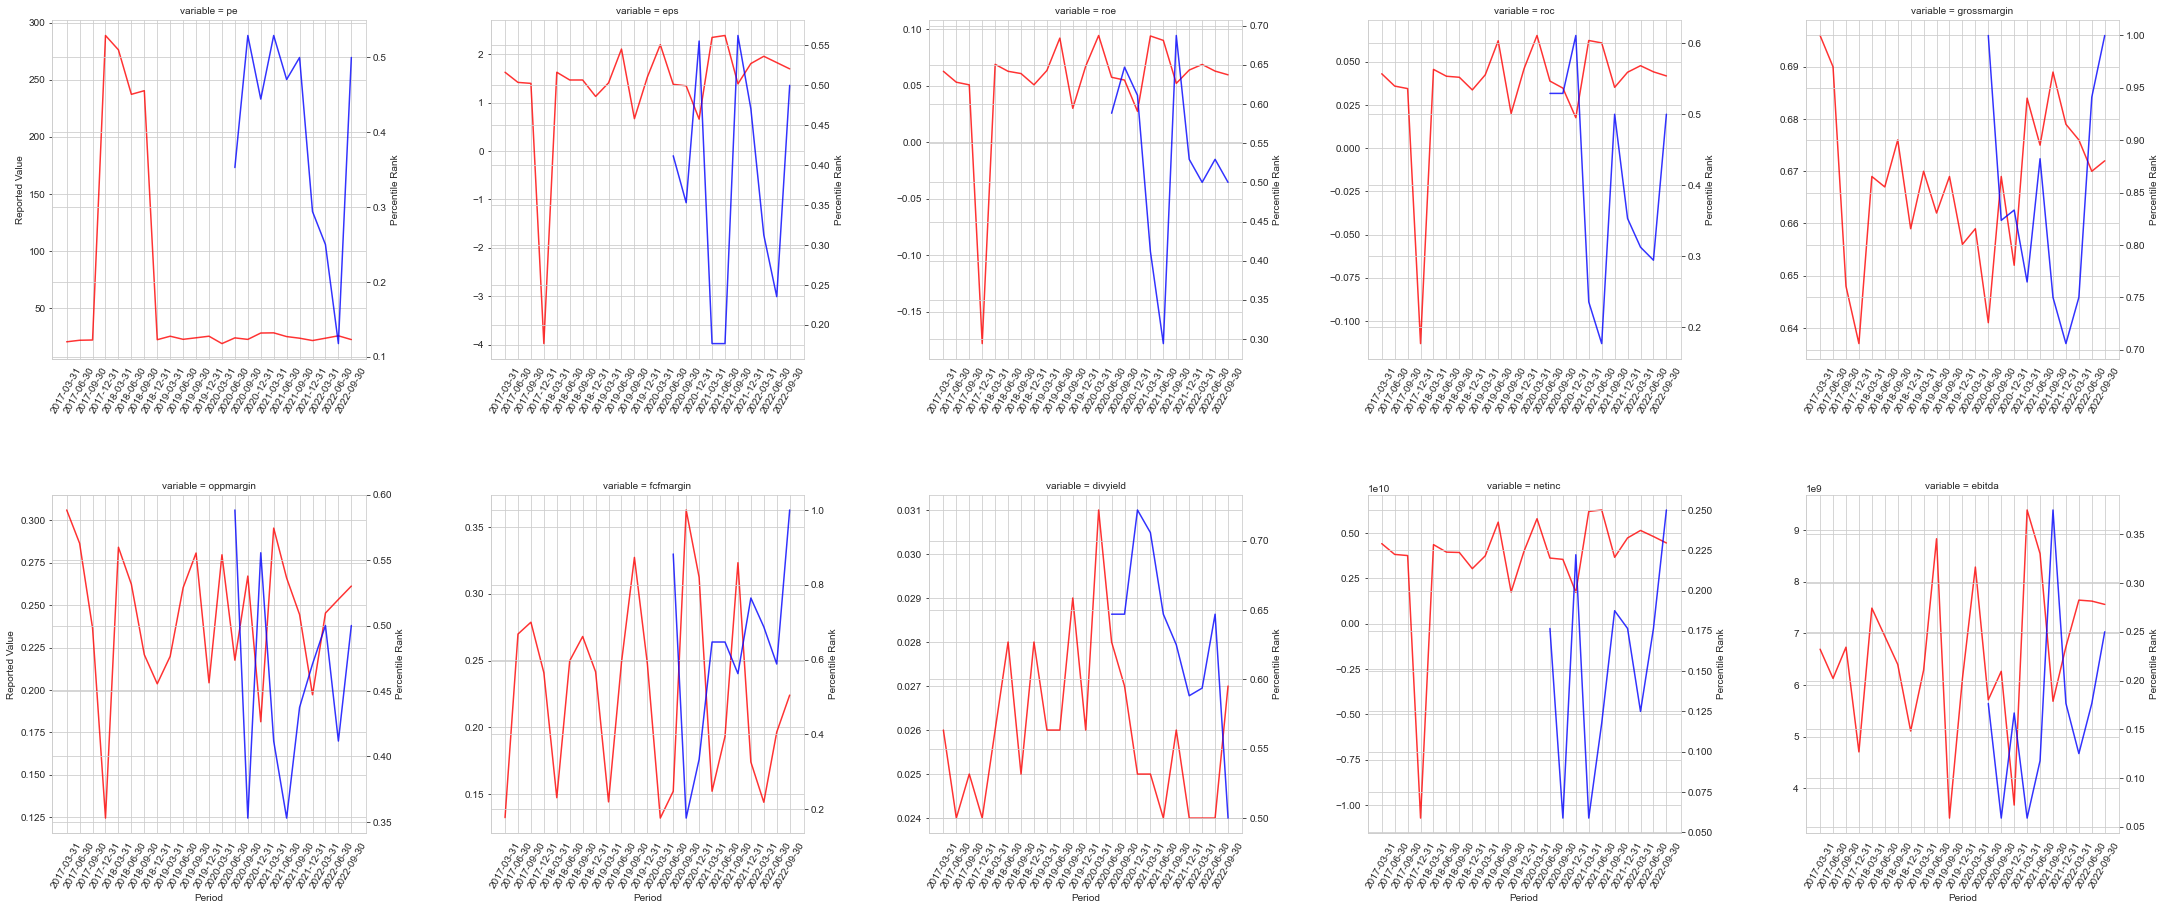

In [16]:
rank.plot_dual_axis_ranks(fun)

Drug Manufacturers - General


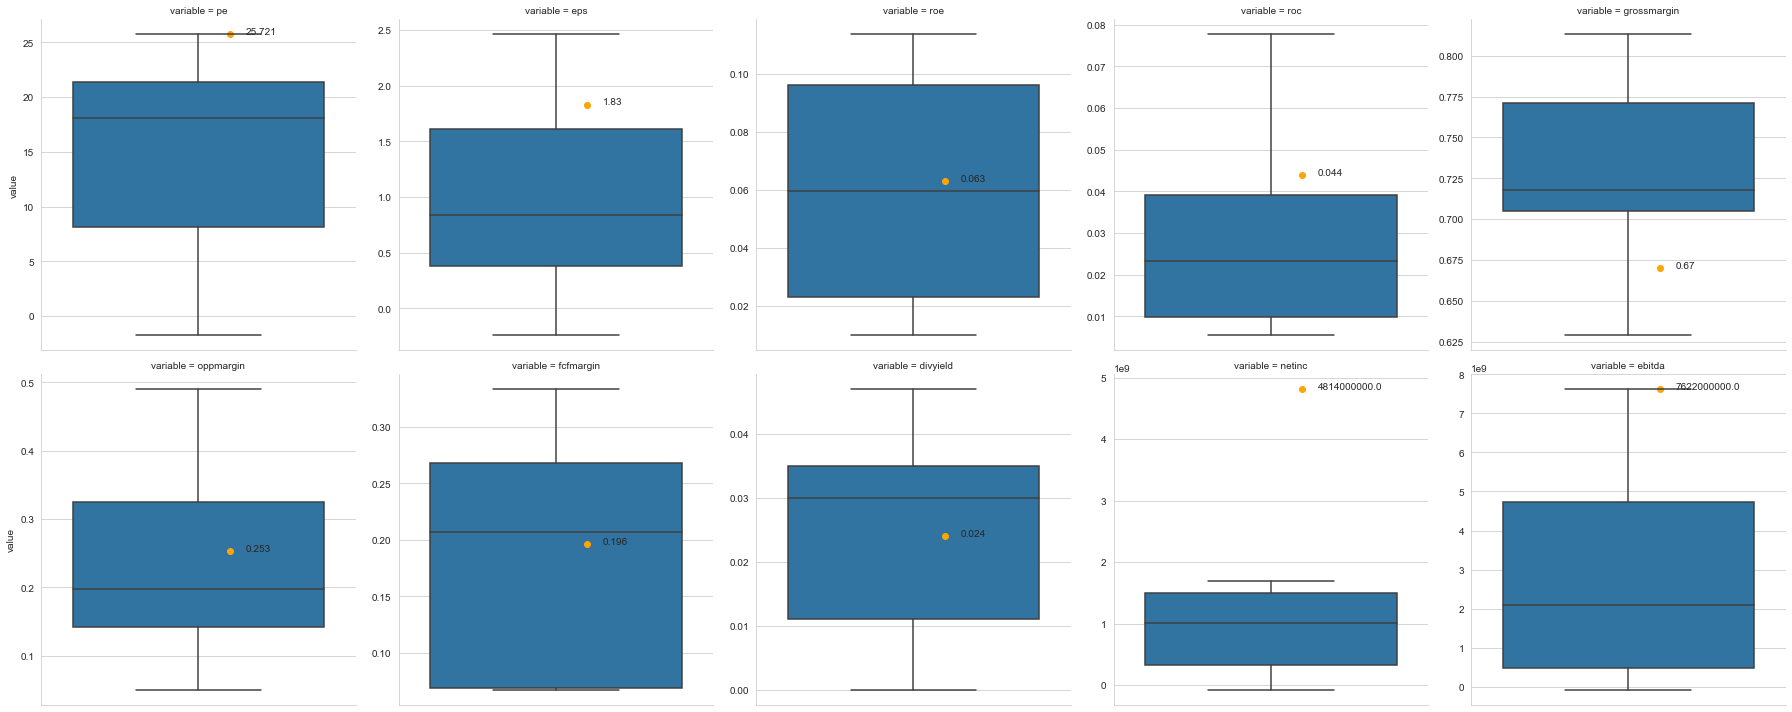

In [17]:
fun.plot_box_plot(cols = ['pe','eps','roe','roc','grossmargin', 'oppmargin','fcfmargin', 'divyield','netinc', 'ebitda'])

In [18]:
peers = fun.get_peers()
fun = Fundamentals( ticker = peers)
print(fun)

x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.get( columns = Columns.PEERS.value, limit = 5 ).style_jupyter(fun.df, units = '%')
z = fun.get( columns = Columns.CASHFLOW_.value, limit = 5 ).style_jupyter(fun.df)

display_side_by_side(x,y,z)

Drug Manufacturers - General
Fundamentals:Object:['JNJ', 'PFE', 'MRK', 'ABBV']


calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 revenue 
 ABBV 
 $14,342 
 $14,886 
 $13,538 
 $14,583 
 $nan 
 
 
 JNJ 
 $23,338 
 $24,804 
 $23,426 
 $24,020 
 $23,791 
 
 
 MRK 
 $13,154 
 $13,521 
 $15,901 
 $14,593 
 $nan 
 
 
 PFE 
 $24,094 
 $23,635 
 $25,661 
 $27,742 
 $nan 
 
 
 cogs 
 ABBV 
 $4,390 
 $4,320 
 $4,052 
 $4,170 
 $nan 
 
 
 JNJ 
 $7,250 
 $7,955 
 $7,598 
 $7,919 
 $7,807 
 
 
 MRK 
 $3,450 
 $3,874 
 $5,380 
 $4,216 
 $nan 
 
 
 PFE 
 $9,973 
 $9,589 
 $9,984 
 $8,648 
 $nan 
 
 
 gp 
 ABBV 
 $9,952 
 $10,566 
 $9,486 
 $10,413 
 $nan 
 
 
 JNJ 
 $16,088 
 $16,849 
 $15,828 
 $16,101 
 $15,984 
 
 
 MRK 
 $9,704 
 $9,647 
 $10,521 
 $10,377 
 $nan 
 
 
 PFE 
 $14,121 
 $14,046 
 $15,677 
 $19,094 
 $nan 
 
 
 opex 
 ABBV 
 $5,646 
 $5,492 
 $4,769 
 $7,118 
 $nan 
 
 
 JNJ 
 $10,382 
 $11,957 
 $10,080 
 $10,014 
 $9,768 
 
 
 MRK 
 $4,888 
 $6,072 
 $4,952 
 $5,452 
 $nan 
 
 
 PFE 
 $6,283 
 $9,864 
 $6,626 
 $7,647 
 $nan 
 
 
 opinc 
 ABBV 
 $4,306 
 $5,074 
 $4,717 
 $3,295 
 $nan 
 
 
 JNJ 
 $5,706 
 $4,892 
 $5,748 
 $6,087 
 $6,216 
 
 
 MRK 
 $4,816 
 $3,575 
 $5,569 
 $4,925 
 $nan 
 
 
 PFE 
 $7,838 
 $4,182 
 $9,051 
 $11,447 
 $nan 
 
 
 ebt 
 ABBV 
 $3,687 
 $4,270 
 $4,926 
 $1,179 
 $nan 
 
 
 JNJ 
 $3,849 
 $4,836 
 $5,862 
 $5,840 
 $5,822 
 
 
 MRK 
 $5,262 
 $3,843 
 $4,864 
 $4,482 
 $nan 
 
 
 PFE 
 $7,816 
 $3,728 
 $9,036 
 $11,475 
 $nan 
 
 
 netinc 
 ABBV 
 $3,179 
 $4,044 
 $4,490 
 $924 
 $nan 
 
 
 JNJ 
 $3,667 
 $4,736 
 $5,149 
 $4,814 
 $4,458 
 
 
 MRK 
 $4,567 
 $3,758 
 $4,310 
 $3,944 
 $nan 
 
 
 PFE 
 $8,147 
 $3,394 
 $7,864 
 $9,905 
 $nan 
 
 
 ebitda 
 ABBV 
 $6,399 
 $6,820 
 $7,518 
 $3,763 
 $nan 
 
 
 JNJ 
 $5,683 
 $6,739 
 $7,641 
 $7,622 
 $7,558 
 
 
 MRK 
 $6,021 
 $4,678 
 $5,984 
 $5,420 
 $nan 
 
 
 PFE 
 $9,176 
 $5,005 
 $10,223 
 $12,650 
 $nan 
 
 
 depamor 
 ABBV 
 $2,127 
 $1,979 
 $2,053 
 $2,052 
 $nan 
 
 
 JNJ 
 $1,814 
 $1,843 
 $1,769 
 $1,744 
 $1,685 
 
 
 MRK 
 $759 
 $835 
 $1,120 
 $938 
 $nan 
 
 
 PFE 
 $1,360 
 $1,277 
 $1,187 
 $1,175 
 $nan 
 
 
 
 
 
 
 
   
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 divyield 
 ABBV 
 4.70% 
 3.80% 
 3.30% 
 3.50% 
 nan% 
 
 
 JNJ 
 2.60% 
 2.40% 
 2.40% 
 2.40% 
 2.70% 
 
 
 MRK 
 3.50% 
 3.40% 
 3.30% 
 3.00% 
 nan% 
 
 
 PFE 
 3.60% 
 2.60% 
 3.00% 
 3.00% 
 nan% 
 
 
 grossmargin 
 ABBV 
 69.40% 
 71.00% 
 70.10% 
 71.40% 
 nan% 
 
 
 JNJ 
 68.90% 
 67.90% 
 67.60% 
 67.00% 
 67.20% 
 
 
 MRK 
 73.80% 
 71.30% 
 66.20% 
 71.10% 
 nan% 
 
 
 PFE 
 58.60% 
 59.40% 
 61.10% 
 68.80% 
 nan% 
 
 
 netmargin 
 ABBV 
 69.39% 
 70.98% 
 70.07% 
 71.41% 
 nan% 
 
 
 JNJ 
 68.93% 
 67.93% 
 67.57% 
 67.03% 
 67.19% 
 
 
 MRK 
 73.77% 
 71.35% 
 66.17% 
 71.11% 
 nan% 
 
 
 PFE 
 58.61% 
 59.43% 
 61.09% 
 68.83% 
 nan% 
 
 
 fcfmargin 
 ABBV 
 53.81% 
 32.84% 
 35.06% 
 33.34% 
 nan% 
 
 
 JNJ 
 32.32% 
 17.40% 
 14.39% 
 19.64% 
 22.41% 
 
 
 MRK 
 27.56% 
 28.27% 
 23.75% 
 21.74% 
 nan% 
 
 
 PFE 
 42.35% 
 20.82% 
 22.98% 
 26.74% 
 nan% 
 
 
 oppmargin 
 ABBV 
 30.02% 
 34.09% 
 34.84% 
 22.59% 
 nan% 
 
 
 JNJ 
 24.45% 
 19.72% 
 24.54% 
 25.34% 
 26.13% 
 
 
 MRK 
 36.61% 
 26.44% 
 35.02% 
 33.75% 
 nan% 
 
 
 PFE 
 32.53% 
 17.69% 
 35.27% 
 41.26% 
 nan% 
 
 
 roe 
 ABBV 
 23.46% 
 26.25% 
 27.57% 
 6.31% 
 nan% 
 
 
 JNJ 
 5.22% 
 6.40% 
 6.89% 
 6.30% 
 5.98% 
 
 
 MRK 
 12.76% 
 9.84% 
 10.54% 
 9.12% 
 nan% 
 
 
 PFE 
 10.76% 
 4.40% 
 9.54% 
 11.36% 
 nan% 
 
 
 roic 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 ros 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 


## DCF

In [16]:
fun = Fundamentals( ticker = ticker)

## Base Case

In [17]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.025)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.05)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099822190137147
wacc:  0.0285228642758371
npv:  23785727677.176994
terminal value:  173923120461.1456
pv future cash flows:  75.19791571292333


## Bull

In [18]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.06)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.06)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099822433813175
wacc:  0.028586640416191418
npv:  26326700459.668915
terminal value:  207160135363.18564
pv future cash flows:  88.80595666613925


# Bear

In [19]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.01)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.02)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099819044169962
wacc:  0.028498053626122736
npv:  22765010319.457024
terminal value:  157099779386.94983
pv future cash flows:  68.41098627311953


# Technicals

In [25]:
tech = Technicals()

[*********************100%***********************]  1 of 1 completed
Adj Close    174.869995
Name: 2022-10-28 00:00:00, dtype: float64


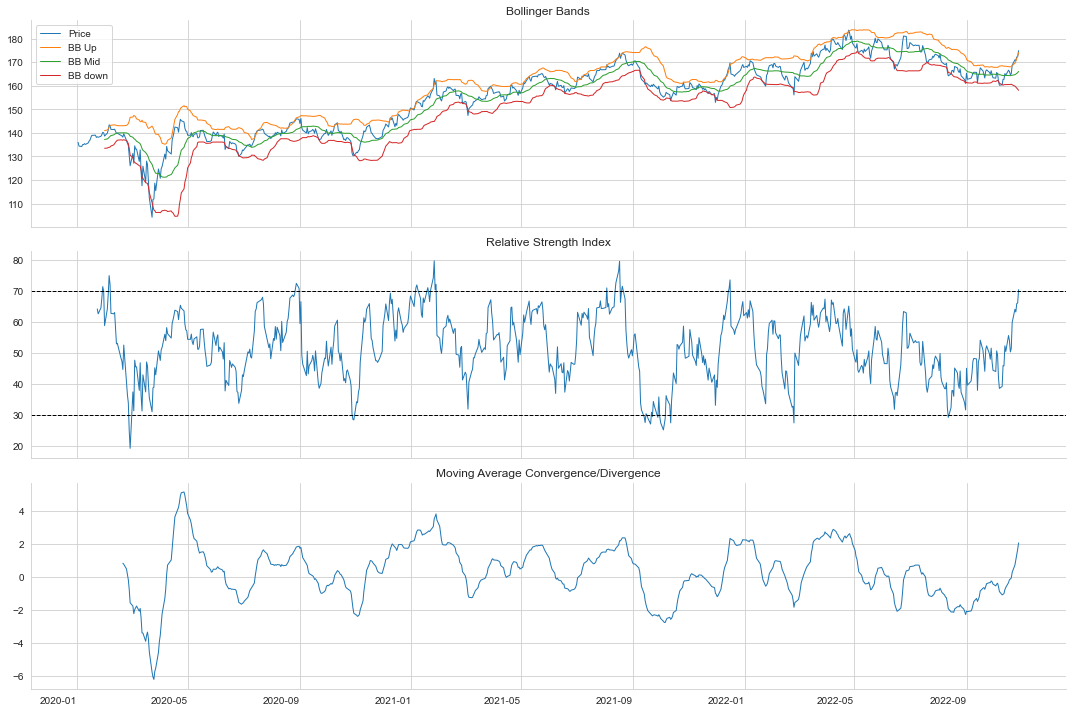

In [26]:
tech.ta_dashboard(fun)

# Rates

In [27]:
ust = Treasuries(years = ['2021', '2022'])

In [28]:
ust.df.tail()

1 Month  2 Month  3 Month  6 Month  1 Year  2 Year  3 Year  \
date                                                                     
2022-10-26     3.54     3.85     4.11     4.47    4.54    4.39    4.41   
2022-10-27     3.76     3.95     4.13     4.44    4.50    4.30    4.29   
2022-10-28     3.75     3.95     4.18     4.51    4.55    4.41    4.38   
2022-10-31     3.73     4.00     4.22     4.57    4.66    4.51    4.45   
2022-11-01     3.72     4.00     4.23     4.58    4.75    4.54    4.48   

            5 Year  7 Year  10 Year  20 Year  30 Year  
date                                                   
2022-10-26    4.20    4.12     4.04     4.38     4.19  
2022-10-27    4.09    4.01     3.96     4.32     4.12  
2022-10-28    4.19    4.10     4.02     4.38     4.15  
2022-10-31    4.27    4.18     4.10     4.44     4.22  
2022-11-01    4.27    4.18     4.07     4.37     4.14

<AxesSubplot:ylabel='date'>

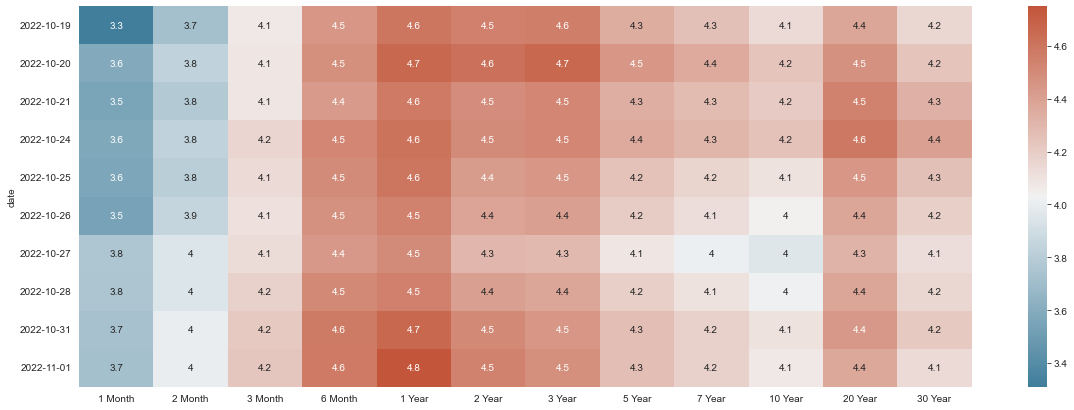

In [29]:
import seaborn as sns
cmap = sns.diverging_palette(20, 230, as_cmap=True)

sns.heatmap(ust.df.iloc[-10:], cmap = cmap, annot=True)

<AxesSubplot:ylabel='date'>

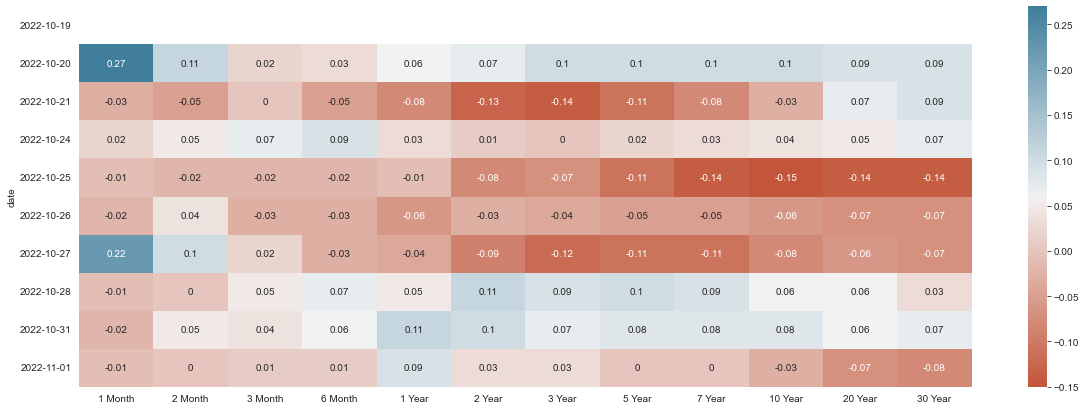

In [32]:
import seaborn as sns
cmap = sns.diverging_palette(20, 230, as_cmap=True)

sns.heatmap(ust.df.iloc[-10:].diff(axis=0), cmap = cmap, annot=True)

In [33]:
import pandas as pd
delta = pd.DataFrame()
delta['5 days'] = ust.df.iloc[-1] - ust.df.iloc[-5]
delta['10 days'] = ust.df.iloc[-1] - ust.df.iloc[-10]
delta['20 days'] = ust.df.iloc[-1] - ust.df.iloc[-20]
delta['60 days'] = ust.df.iloc[-1] - ust.df.iloc[-60]
delta = delta.T[::-1]
delta.index.name = 'Change Since'
delta

1 Month  2 Month  3 Month  6 Month  1 Year  2 Year  3 Year  \
Change Since                                                               
60 days          1.49     1.57     1.58     1.43    1.45    1.33    1.34   
20 days          0.81     0.77     0.78     0.60    0.60    0.44    0.40   
10 days          0.41     0.28     0.16     0.13    0.15   -0.01   -0.08   
5 days           0.18     0.15     0.12     0.11    0.21    0.15    0.07   

              5 Year  7 Year  10 Year  20 Year  30 Year  
Change Since                                             
60 days         1.36    1.33     1.30     1.15     1.14  
20 days         0.43    0.45     0.45     0.42     0.44  
10 days        -0.08   -0.08    -0.07    -0.01    -0.01  
5 days          0.07    0.06     0.03    -0.01    -0.05

In [ ]:
zeroes, forwards = ust.build_zero_curve()

In [ ]:
zeroes

In [ ]:
forwards

In [34]:
import plotly.graph_objects as go

x = ust.df.columns
y = ust.df.index
z = ust.df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Yield Curves',
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": 0.4}},
                 width=600, height=550)
fig.show()

In [35]:
def market_correlations(join, title, key="SPY"):
    import numpy as np
    fig, axes = plt.subplots(1, 4)
    sns.set_style('whitegrid')

    cmap = sns.diverging_palette(230, 20, as_cmap=True)


    # 20 day corr
    corr = join.iloc[-20:].corr()[key].to_frame().drop(key, axis=0)
    g = sns.heatmap(corr, ax = axes[0],  cmap=cmap, square=True, linewidths=.5, annot = True, cbar = True,  cbar_kws={"shrink": .5})



    g.set_title('20 day Correlation')

    g.set_yticklabels(g.get_yticklabels(), rotation=45)


    # 60 day corr

    corr = join.iloc[-60:].corr()[key].to_frame().drop(key, axis=0)
    g = sns.heatmap(corr,  ax = axes[1], cmap=cmap, square=True, linewidths=.5, annot = True, cbar = True, cbar_kws={"shrink": .5} )


    g.set_title('60 day Correlation')

    g.set_yticklabels(g.get_yticklabels(), rotation=45)

    fig.suptitle('Correlation of US Treasuries and S&P 500')


    # 252 day corr
    corr = join.iloc[-252:].corr()[key].to_frame().drop(key, axis=0)
    g = sns.heatmap(corr,  ax = axes[2], cmap=cmap, square=True, linewidths=.5, annot = True, cbar = True, cbar_kws={"shrink": .5} )



        
    g.set_title('252 day Correlation')

    g.set_yticklabels(g.get_yticklabels(), rotation=45)
    
    
    # 5 Year (1260 d) corr
    corr = join.iloc[-1260:].corr()[key].to_frame().drop(key, axis=0)
    g = sns.heatmap(corr,  ax = axes[3], cmap=cmap, square=True, linewidths=.5, annot = True, cbar = True, cbar_kws={"shrink": .5} )

    g.set_title('5 Year (1260 day) Correlation')

    g.set_yticklabels(g.get_yticklabels(), rotation=45)
    
    
    fig.suptitle(title, fontsize=16)

    fig.tight_layout()
    sns.despine()
    

[*********************100%***********************]  4 of 4 completed


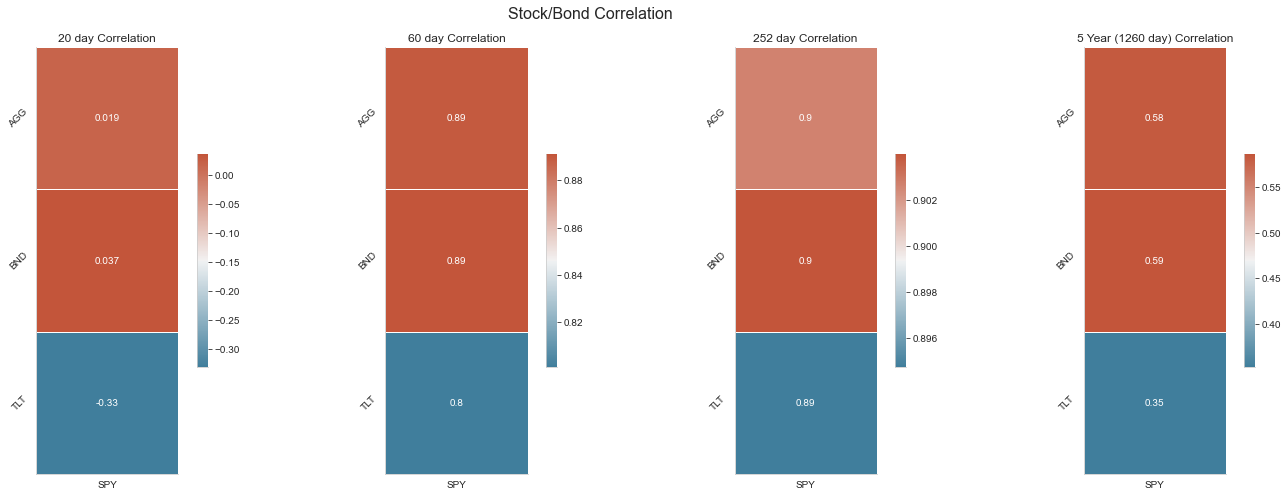

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from calendar_dates import Calendar
import yfinance as yf

cal = Calendar()
data = yf.download(f"TLT AGG BND SPY", start="2015-01-01", end=cal.today())['Adj Close']
market_correlations(data, title = 'Stock/Bond Correlation')

[*********************100%***********************]  1 of 1 completed


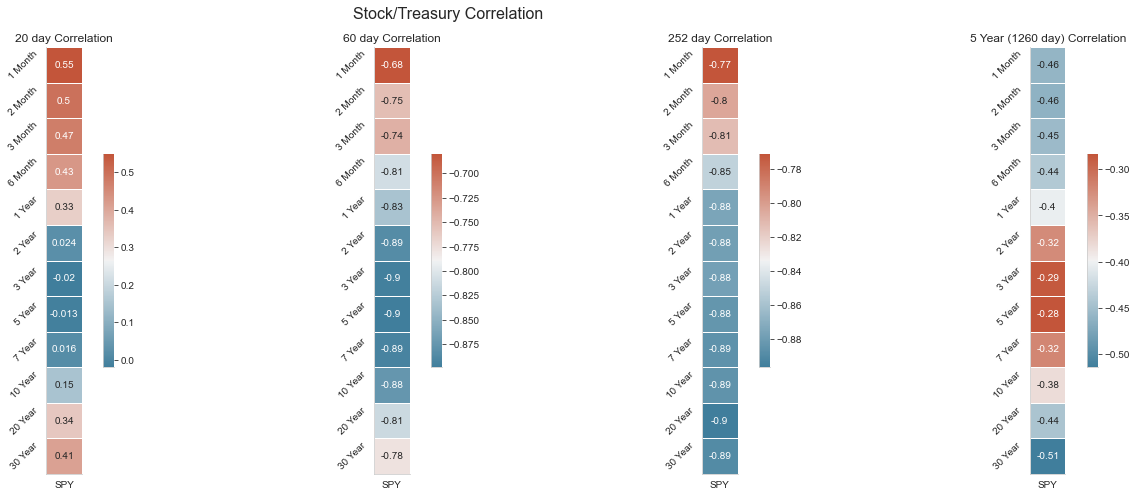

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from calendar_dates import Calendar
import yfinance as yf

cal = Calendar()
spy = yf.download(f"SPY", start="2017-01-01", end=cal.today())['Adj Close'].to_frame().rename(columns = {'Adj Close':'SPY'}).reset_index().rename(columns = {'Date':'date'})
spy.date = [d.strftime('%Y-%m-%d') for d in spy.date]
spy.set_index('date', inplace = True)
join = ust.df.merge(spy, how = 'inner', left_index = True, right_index = True)
join

market_correlations(join, title = 'Stock/Treasury Correlation')

[*********************100%***********************]  4 of 4 completed


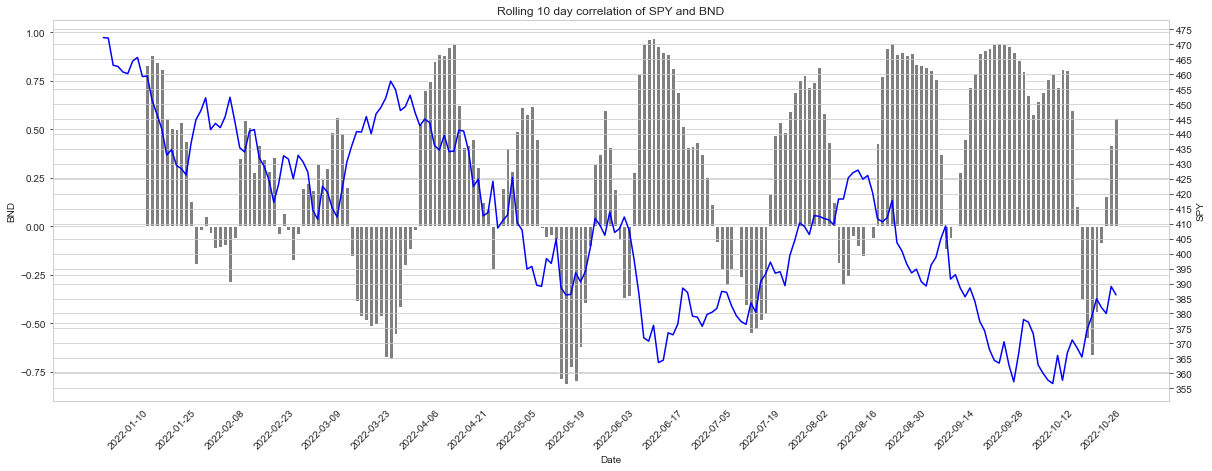

In [39]:
data = yf.download(f"TLT AGG BND SPY", start="2022-01-01", end=cal.today())['Adj Close']
roll = data['SPY'].rolling(10).corr(data[['BND','AGG','TLT']])
roll.reset_index(inplace=True)
roll.Date = [d.strftime('%Y-%m-%d') for d in roll.Date]
data.reset_index(inplace = True)
data.Date = [d.strftime('%Y-%m-%d') for d in data.Date]

g = sns.barplot(data=roll, x = 'Date', y = 'BND', color = 'grey')

ax2 = plt.twinx()
sns.lineplot(data=data, x = 'Date', y = 'SPY', color="b", ax=ax2)

plt.title('Rolling 10 day correlation of SPY and BND')

g.set_xticklabels(g.get_xticklabels(), rotation=45)
for label in g.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.locator_params(nbins=50)


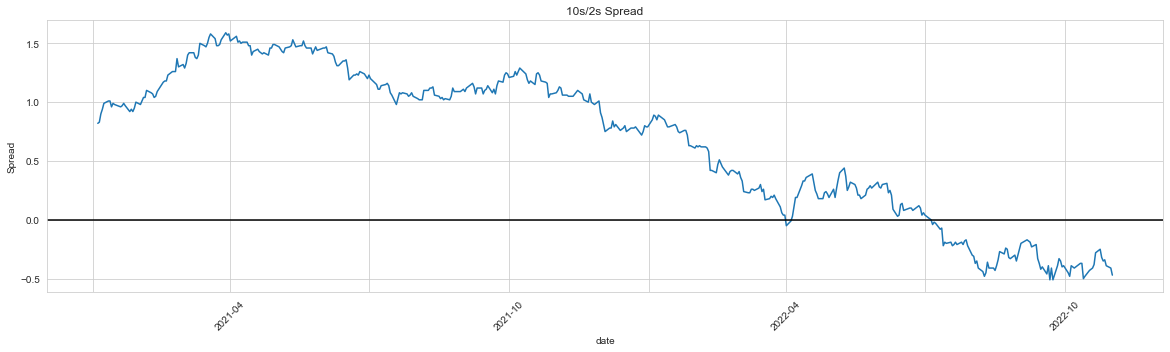

In [54]:
import pandas as pd
plt.figure(figsize = (20,5))

raw = ust.df.reset_index()
raw.date = pd.to_datetime(raw.date)
spread = raw[['date','10 Year', '2 Year']]
spread['Spread'] = spread['10 Year'] - spread['2 Year']
g = sns.lineplot(data=spread, x = 'date', y = 'Spread')
plt.xticks(rotation=45)
plt.axhline(0, c='black')
plt.title('10s/2s Spread')

for label in g.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

<AxesSubplot:title={'center':'10 Year Breakeven Inflation Rate'}>

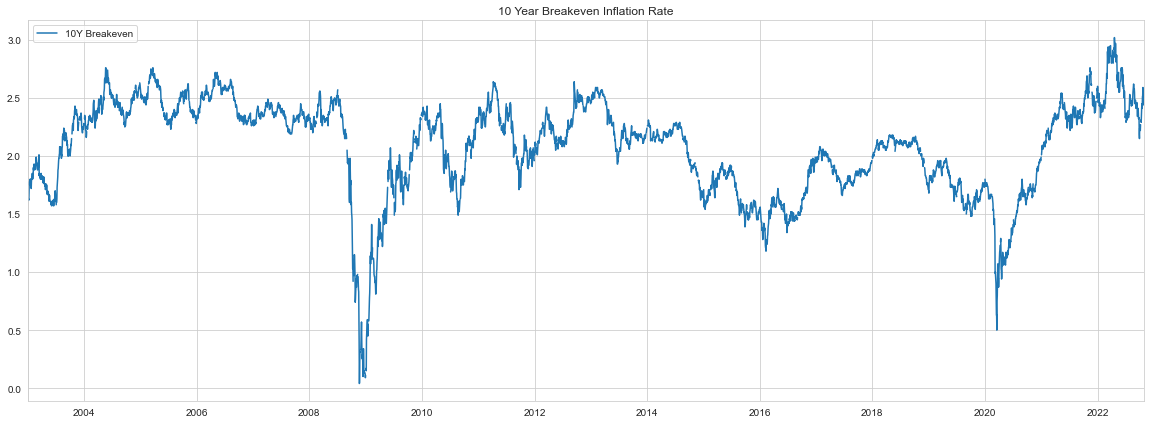

In [65]:
import sys, os, json
import fredapi
proj_root = os.path.abspath('')
fp = os.path.join(proj_root, 'secrets.json')
with open(fp) as f:
    data = json.load(f)
fred_api_key = data['fred_api_key'] 

# Moodys seasoned bond yields
fred = fredapi.Fred(api_key=fred_api_key)
data = fred.get_series('T10YIE').to_frame().rename(columns={0:'10Y Breakeven'})
data.plot(title='10 Year Breakeven Inflation Rate')

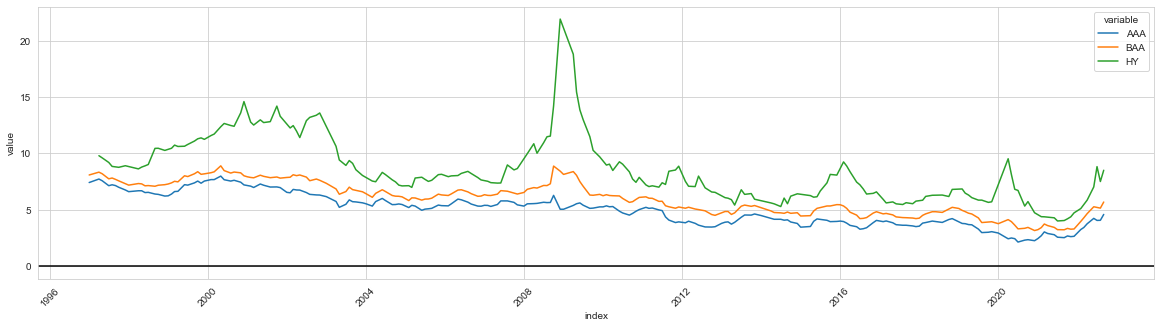

In [42]:
# Moodys seasoned bond yields
fred = fredapi.Fred(api_key=fred_api_key)
credit_spreads = fred.get_series('AAA').to_frame().rename(columns={0:'AAA'}).merge( 
    fred.get_series('BAA').to_frame().rename(columns={0:'BAA'}), left_index=True, right_index=True).merge(
    fred.get_series('BAMLH0A0HYM2EY').to_frame().rename(columns={0:'HY'}), left_index=True, right_index=True)
credit_spreads.tail()

melt = credit_spreads.reset_index().melt(id_vars=['index'])
plt.figure(figsize = (20,5))

g = sns.lineplot(data=melt, x = 'index', y = 'value', hue = 'variable')
plt.xticks(rotation=45)
plt.axhline(0, c='black')

# Economic Activity

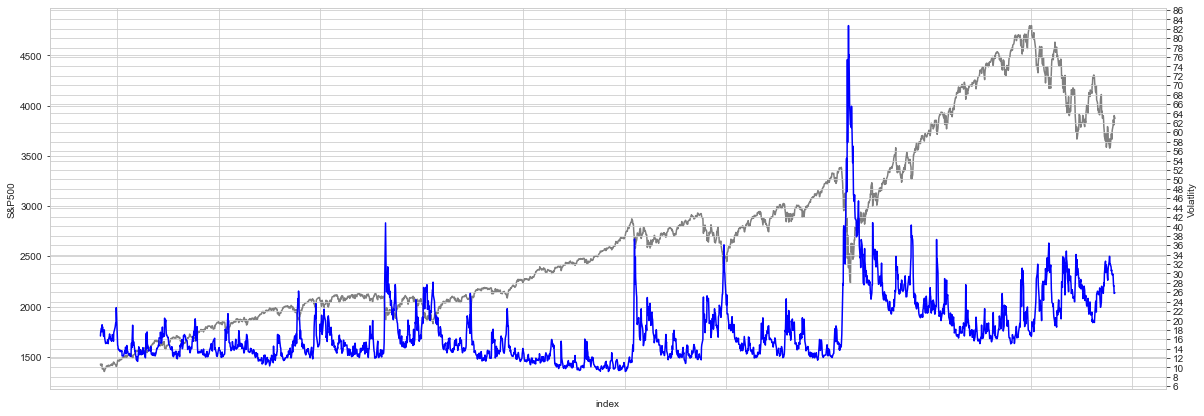

In [52]:
fred = fredapi.Fred(api_key=fred_api_key)
data = fred.get_series('VIXCLS').to_frame().rename(columns={0:'Volatlity'}).merge(fred.get_series('SP500').to_frame().rename(columns={0:'S&P500'}), left_index = True, right_index = True)

data.reset_index(inplace = True)
data
g = sns.lineplot(data=data, x = 'index', y = 'S&P500', color = 'orange')

ax2 = plt.twinx()
sns.lineplot(data=data, x = 'index', y = 'Volatlity', color="b", ax=ax2)

# plt.title('Rolling 10 day correlation of SPY and BND')

g.set_xticklabels(g.get_xticklabels(), rotation=45)
for label in g.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.locator_params(nbins=50)


<AxesSubplot:>

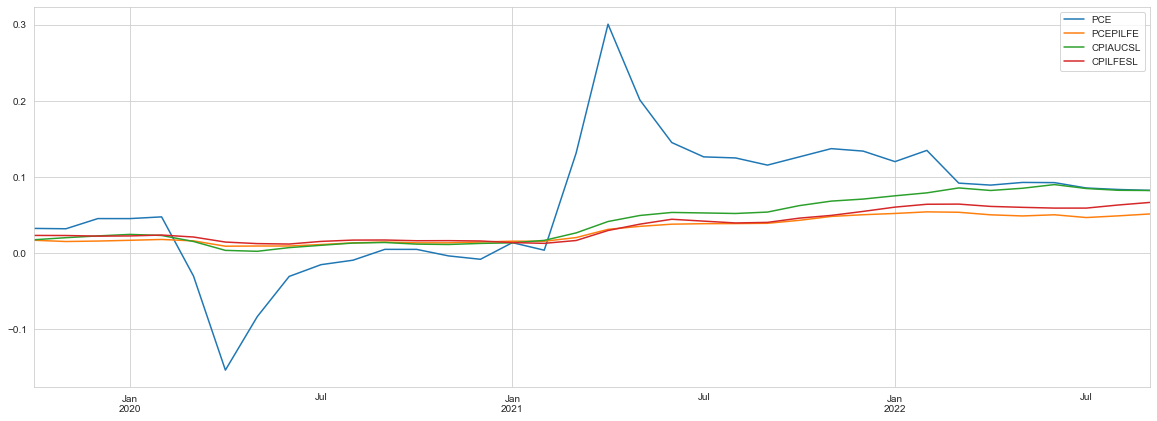

In [59]:
inflation = fred.get_series('PCE').to_frame().rename(columns={0:'PCE'}).merge( 
    fred.get_series('PCEPILFE').to_frame().rename(columns={0:'PCEPILFE'}), left_index=True, right_index=True).merge( # Core PCE 
    fred.get_series('CPIAUCSL').to_frame().rename(columns={0:'CPIAUCSL'}), left_index=True, right_index=True).merge( # CPI 
    fred.get_series('CPILFESL').to_frame().rename(columns={0:'CPILFESL'}), left_index=True, right_index=True) # Core CPI
inflation_yoy = (inflation / inflation.shift(12)) -1
inflation_yoy.iloc[-36:].plot()

<AxesSubplot:>

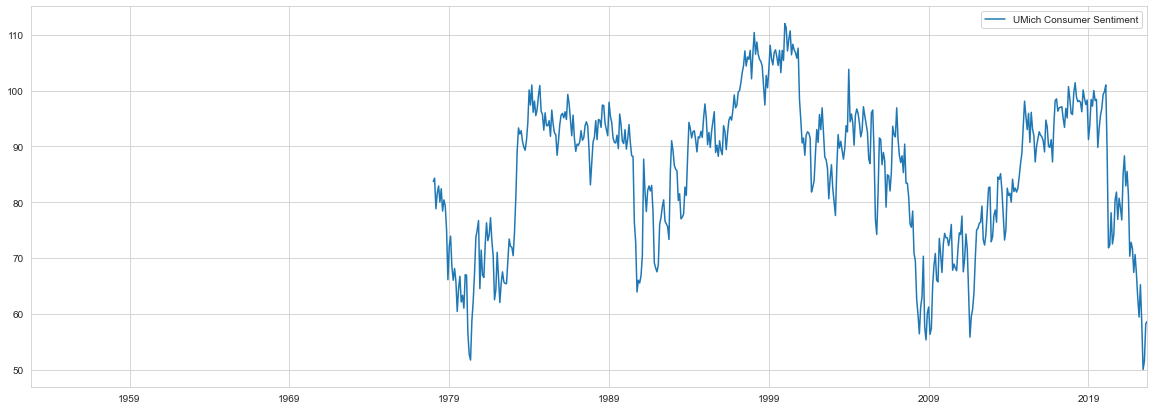

In [62]:
# overlay recession
data = fred.get_series('UMCSENT').to_frame().rename(columns={0:'UMich Consumer Sentiment'})
data.plot()